Natural Language Toolkit contains multiple language dictionaries. In our case, we are interested only in the English dictionary

In [1]:
!pip install nltk # install the Natural Language Toolkit

In [2]:
print("Importing Natural Language Toolkit")
import nltk
nltk.download('stopwords') # stopwords: need to be removed from our database so that we can find the most frequent words

Importing Natural Language Toolkit


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
print("English Stopwords array")
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
for stopword in english_stopwords:
    print(stopword)

English Stopwords array
i
me
my
myself
we
our
ours
ourselves
you
you're
you've
you'll
you'd
your
yours
yourself
yourselves
he
him
his
himself
she
she's
her
hers
herself
it
it's
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
that'll
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
don't
should
should've
now
d
ll
m
o
re
ve
y
ain
aren
aren't
couldn
couldn't
didn
didn't
doesn
doesn't
hadn
hadn't
hasn
hasn't
haven
haven't
isn
isn't
ma
mightn
mightn't
mustn
mustn't
needn
needn't
shan
shan't
shouldn
shouldn't
wasn
wasn't
weren
weren't
won
won't
wouldn
wouldn't


Accuracy: How many predictions were correct

In [4]:
def accuracy(predictions, ytest):
    correct = 0
    for i in range(len(predictions)):
        if predictions[i] == ytest[i]:
            correct += 1
    return correct / len(predictions)

Precision: True Positives / (True Positives + False Positives)

In [5]:
def precision(predictions, ytest):
    true_positives = 0
    false_positives = 0
    for i in range(len(predictions)):
        if predictions[i] == 1 and ytest[i] == 1:
            true_positives += 1
        if predictions[i] == 1 and ytest[i] == 0:
            false_positives += 1
    return true_positives / (true_positives + false_positives)

Recall: True Positives / (True Positives + False Negatives)

In [6]:
def recall(predictions, ytest):
    true_positives = 0
    false_negatives = 0
    for i in range(len(predictions)):
        if predictions[i] == 1 and ytest[i] == 1:
            true_positives += 1
        if predictions[i] == 0 and ytest[i] == 1:
            false_negatives += 1
    return true_positives / (true_positives + false_negatives)

F1-Score: Harmonic mean of precision and recall

In [7]:
def f1_score(predictions, ytest, b=1):
    p = precision(predictions,ytest)
    r = recall(predictions,ytest)
    return  (b**2 + 1) * ((p*r) / ((b**2)*p + r))

Node Class: Reference to each word. Using Nodes we construct a big word tree from which our predictions take place

In [8]:
class Node:
    def __init__(self):
        self.checking_feature = None
        self.children = []
        self.is_leaf = False

    def print_node(self):
      print("Node:")
      print("_"*6 + "\n" + str(self.value) +"\n" + "\u203E"*6)

    def print_children(self):
      print("Children of Node " + str(self.value) + ":")
      for i in range(len(self.children)):
          print("_"*6 + "\n" + str(self.children[i].value) +"\n" + "\u203E"*6)

**ID3 Algorithm**: The ID3 (Iterative Dichotomiser 3) algorithm is used for constructing decision trees in machine learning problems. Starting with all the training data, it selects the feature that makes the greatest discriminative distinction. It creates a node in the tree with this feature and splits the data accordingly. The process is repeated for each subset, proceeding in depth, until a termination criterion is met, such as complete classification or reaching a predetermined depth. The final decision tree can be used to classify new data based on their features.

**calculate_bin_entropy**

Calculates the entropy for a binary event with a success probability prob. In the context of the ID3 algorithm, entropy serves as a measure of uncertainty or impurity in a dataset. Low entropy indicates that the set is homogeneous, while high entropy indicates uncertainty and impurity.

**calculate_ig**

Calculates the Information Gain (IG) for each feature in the feature table as a function of the class labels (y). It uses entropy (calculate_bin_entropy) to compute the initial entropy (HC). It calculates the probabilities and the corresponding entropies for various cases. It computes the Information Gain for each feature.



In [9]:
import numpy as np
from math import log2

class ID3 ():

    def calculate_bin_entropy(self, prob):
        if prob < 0.0 or prob > 1.0:
            print("Invalid probability!")
            return
        elif prob == 0.0 or prob == 1.0:
            return 0
        else:
            return -(prob*log2(prob) + (1-prob)*log2(1-prob))

    def calculate_ig(self, features, y):

        how_many_rows = features.shape[0]
        how_many_columns = features.shape[1]

        if(how_many_rows == 0 or how_many_columns == 0):
          print("Invalid table dimensions!")

        prob = np.where(y == 1)[0].shape[0] / y.shape[0]
        HC = self.calculate_bin_entropy(prob)

        PX1 = np.zeros(how_many_columns)
        PC1X1 = np.zeros(how_many_columns)
        PC1X0 = np.zeros(how_many_columns)
        HCX1 = np.zeros(how_many_columns)
        HCX0 = np.zeros(how_many_columns)

        IG = np.zeros(how_many_columns)

        for j in np.nditer(np.arange(how_many_columns)):
            column = features[:,j]
            cX1 = np.sum( column )
            cC1X1 = np.where( column + y == 2 )[0].shape[0]
            cC1X0 = np.where( column < y )[0].shape[0]

            PX1[j] = float(cX1/how_many_rows)

            if(cX1 == 0):
                PC1X1[j] = 0.0
            else:
                PC1X1[j] = float(cC1X1/cX1)

            if(cX1 == how_many_rows):
                PC1X0[j] = 0.0
            else:
                PC1X0[j] = cC1X0/(how_many_rows-cX1)

            HCX1[j] = self.calculate_bin_entropy(PC1X1[j])
            HCX0[j] = self.calculate_bin_entropy(PC1X0[j])
            IG[j] = HC - ( (PX1[j] * HCX1[j]) + ( (1.0 - PX1[j]) * HCX0[j]) )

        return IG

    def FindMaxIG(self, IGS):
        if len(IGS) == 0:
            print("IG array empty!")
            return
        return np.where(IGS == max(IGS))[0][0]

    def GetMostCommonFeature(self, y):
        positives = np.where(y==1)[0].shape[0]
        negatives = np.where(y==0)[0].shape[0]
        if positives > negatives:
            return 1
        else:
            return 0


    # TRAINING
    def fit(self, decision_table, y, features, most_common_feature = 0):

      tree_root = Node()

      if decision_table.shape[0] == 0 or y.shape[0] == 0:
            tree_root.is_leaf = True
            tree_root.value = most_common_feature
            return tree_root
      elif np.unique(y).shape[0] == 1:
            tree_root.is_leaf = True
            tree_root.value = y[0]
            return tree_root
      elif decision_table.shape[1] == 0 or len(features) == 0:
            tree_root.is_leaf = True
            tree_root.value = self.getMostCommonCategory(y)
            return tree_root
      else:
          max_ig_index = self.FindMaxIG(self.calculate_ig(decision_table,y))
          tree_root.value = features[max_ig_index]
          m = self.GetMostCommonFeature(y)
          for value in [0,1]:
            new_y = y[decision_table[:,max_ig_index]==value]
            new_table = decision_table[decision_table[:,max_ig_index]==value]
            new_table = np.delete(new_table, max_ig_index, axis=1)
            new_features = np.delete(features, max_ig_index)
            tree_root.children.append(self.fit(new_table, new_y, new_features, m))

          return tree_root

    # PREDICT
    def predict(self, X_Test, tree_root, features):
        if X_Test.shape[0] == 0:
            print("Invalid array!")
            return
        if tree_root == None:
            print("No Tree root found!")
            return

        predictions = np.zeros(X_Test.shape[0])
        for i in range(X_Test.shape[0]):

            node = tree_root
            comment = X_Test[i,:]
            for _ in range(comment.shape[0]+1):
                if node.is_leaf == True:
                    prediction = node.value
                    break

                current_feature_idx = features.index(node.value)

                if comment[current_feature_idx] == 0:
                    node = node.children[0]
                    continue

                if comment[current_feature_idx] == 1:
                    node = node.children[1]
                    continue
            predictions[i] = prediction

        return predictions

In [10]:
import tensorflow as tf  
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from gc import collect

In [11]:
N = 1000

def getDataPerPercentage(X, Y, p):
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=1-p)
    return (xtrain, ytrain), (xtest, ytest)


(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.imdb.load_data(num_words = N)

17464789/17464789 [==============================] - 0s 0us/step


In [12]:
import pandas as pd
import numpy as np

# Check dimensions
print("Training set dimensions:")
print("xtrain_split shape:", xtrain.shape)
print("ytrain_split shape:", ytrain.shape)

print("\nTesting set dimensions:")
print("xtest shape:", xtest.shape)
print("ytest shape:", ytest.shape)

# Check for null values
print("\nNull values in training set:")
print("Null values in xtrain_split:", np.sum(pd.isnull(xtrain)))
print("Null values in ytrain_split:", np.sum(pd.isnull(ytrain)))

print("\nNull values in testing set:")
print("Null values in xtest:", np.sum(pd.isnull(xtest)))
print("Null values in ytest:", np.sum(pd.isnull(ytest)))

Training set dimensions:
xtrain_split shape: (25000,)
ytrain_split shape: (25000,)

Testing set dimensions:
xtest shape: (25000,)
ytest shape: (25000,)

Null values in training set:
Null values in xtrain_split: 0
Null values in ytrain_split: 0

Null values in testing set:
Null values in xtest: 0
Null values in ytest: 0


The following code is used to create a reverse word mapper for the IMDB dataset, allowing the conversion of word samples from integer indices back to human-readable text. The first mapper (word2index) contains the inverse handler of the IMDB dataset, with each word corresponding to a unique numerical index. Then, a new mapper (index2word) is created that reverses the indices back to their corresponding words, adding three special terms ([pad], [bos], [oov]) used for padding, the beginning of a sentence, and unknown words, respectively. This reverse mapper is useful when we want to interpret sequences of word samples as text, as it allows the translation of numerical indices back into human language. The special terms add flexibility in handling cases such as padding, recognizing the beginning of a sentence, and handling unknown words.

In [13]:
word2index = tf.keras.datasets.imdb.get_word_index()

index2word = dict((i + 3, word) for (word, i) in word2index.items())
index2word[0] = '[pad]'  #padding
index2word[1] = '[bos]'  #begining of sentence
index2word[2] = '[oov]'  #out of vocabulary

1641221/1641221 [==============================] - 0s 0us/step


The following code is used to convert sequences of numerical indices (corresponding to words) back into human-readable text. This is achieved through the use of the reverse mapper index2word, which was previously created to reverse the indices.

In [14]:
xtrain = np.array([' '.join([index2word[idx] for idx in text]) for text in xtrain])
xtest = np.array([' '.join([index2word[idx] for idx in text]) for text in xtest])

Create vocabulary

In [15]:
print("Creating the vocabulary")
vocabulary = list()
for text in xtrain:
    tokens = text.split()
    vocabulary.extend(tokens)

vocabulary = list(set(vocabulary))

Creating the vocabulary


Preprocess Vocabulary

In [16]:
print("Preprocessing the vocabulary")
for i in range(len(vocabulary)):
    vocabulary[i] = vocabulary[i].strip()

vocabulary = list(set(vocabulary))

Preprocessing the vocabulary


Remove numbers and simple characters

In [17]:
#remove numbers that are strings and words with length <= 1
for word in vocabulary:
    if word.isnumeric() or len(word) <= 1:
        vocabulary.remove(word)

Remove stopwords

In [18]:
for stopword in english_stopwords:
    if stopword in vocabulary:
        for _ in range(vocabulary.count(stopword)):
            vocabulary.remove(stopword)

Binorize Vectors using vocabulary (25.000 for training and 25.000 and testing)

In [19]:
print("Binarizing vectors")
xtrain_binary = list()
xtest_binary = list()

for text in tqdm(xtrain):
    tokens = text.split()
    binary_vector = list()
    for vocab_token in vocabulary:
        if vocab_token in tokens:
            binary_vector.append(1)
        else:
            binary_vector.append(0)
    xtrain_binary.append(binary_vector)

xtrain_binary = np.array(xtrain_binary)

for text in tqdm(xtest):
    tokens = text.split()
    binary_vector = list()
    for vocab_token in vocabulary:
        if vocab_token in tokens:
            binary_vector.append(1)
        else:
            binary_vector.append(0)
    xtest_binary.append(binary_vector)

xtest_binary = np.array(xtest_binary)

Binarizing vectors


100%|██████████| 25000/25000 [01:29<00:00, 279.01it/s]


Combine Data to X and Y np arrays

In [20]:
X = np.concatenate((xtrain_binary, xtest_binary))
Y = np.concatenate((ytrain, ytest))

Percentages: Training and testing per 10%

For every percentage we save the necessary results

In [21]:
percentages =  [percentage/10 for percentage in range(1, 10)]
custom_train_accuracy = np.empty(len(percentages))
custom_train_precision = np.empty(len(percentages))
custom_train_recall = np.empty(len(percentages))
custom_train_f_measure = np.empty(len(percentages))

custom_test_accuracy= np.empty(len(percentages))
custom_test_precision = np.empty(len(percentages))
custom_test_recall =np.empty(len(percentages))
custom_test_f_measure = np.empty(len(percentages))

In [22]:
clf = ID3() # Make my custom ID3

In [23]:
i = 0
for train_size in percentages:
    print("Testing with " + str(train_size*100) + "% of the data")
    (xtrain_binary, ytrain), (xtest_binary, ytest) = getDataPerPercentage(X,Y,train_size)

    result = clf.fit(xtrain_binary, ytrain, vocabulary)

    train_predictions = clf.predict(xtrain_binary, result, vocabulary)
    test_predictions = clf.predict(xtest_binary, result, vocabulary)

    custom_train_accuracy[i] = accuracy(train_predictions, ytrain)
    custom_train_precision[i] = precision(train_predictions, ytrain)
    custom_train_recall[i] = recall(train_predictions, ytrain)
    custom_train_f_measure[i] = f1_score(train_predictions, ytrain)

    custom_test_accuracy[i] = accuracy(test_predictions, ytest)
    custom_test_precision[i] = precision(test_predictions, ytest)
    custom_test_recall[i] = recall(test_predictions, ytest)
    custom_test_f_measure[i] = f1_score(test_predictions, ytest)

    i += 1
    del xtrain_binary, ytrain, xtest_binary, ytest # we delete the current data and put them in garbage
    collect() # we  collect whatever is left from the garbage
    print()

Testing with 10.0% of the data

Testing with 20.0% of the data

Testing with 30.0% of the data

Testing with 40.0% of the data

Testing with 50.0% of the data

Testing with 60.0% of the data

Testing with 70.0% of the data

Testing with 80.0% of the data

Testing with 90.0% of the data



In [24]:
for i in range(len(percentages)):
    print("----------------------------------------------")
    print(f"Training Size: {percentages[i] * 100}%")
    print(f"Train Accuracy: {custom_train_accuracy[i] * 100}%")
    print(f"Train Precision: {custom_train_precision[i] * 100}%")
    print(f"Train Recall: {custom_train_recall[i] * 100}%")
    print(f"Train F1 Score: {custom_train_f_measure[i] * 100}%")
    print(f"Test Accuracy: {custom_test_accuracy[i] * 100}%")
    print(f"Test Precision: {custom_test_precision[i] * 100}%")
    print(f"Test Recall: {custom_test_recall[i] * 100}%")
    print(f"Test F1 Score: {custom_test_f_measure[i] * 100}%")
    print("----------------------------------------------")
    print()

----------------------------------------------
Training Size: 10.0%
Train Accuracy: 100.0%
Train Precision: 100.0%
Train Recall: 100.0%
Train F1 Score: 100.0%
Test Accuracy: 68.13111111111111%
Test Precision: 68.39622641509435%
Test Recall: 67.57356531001732%
Test F1 Score: 67.98240718001385%
----------------------------------------------

----------------------------------------------
Training Size: 20.0%
Train Accuracy: 100.0%
Train Precision: 100.0%
Train Recall: 100.0%
Train F1 Score: 100.0%
Test Accuracy: 69.39%
Test Precision: 70.55070341509335%
Test Recall: 67.10441227677461%
Test F1 Score: 68.78441770344688%
----------------------------------------------

----------------------------------------------
Training Size: 30.0%
Train Accuracy: 100.0%
Train Precision: 100.0%
Train Recall: 100.0%
Train F1 Score: 100.0%
Test Accuracy: 69.58285714285715%
Test Precision: 69.69575660528423%
Test Recall: 69.50496178852515%
Test F1 Score: 69.60022844089092%
----------------------------------

In [25]:
import matplotlib.pyplot as plt

def DrawPlot(percentages, data, name, t, num_words):
    _, ax = plt.subplots()
    ax.plot(percentages, data)
    ax.set(xlabel="Percentages (%)", ylabel=name,
        title= "{} Plot {}-{}".format(name, str(num_words) + " words", t))
    plt.show()

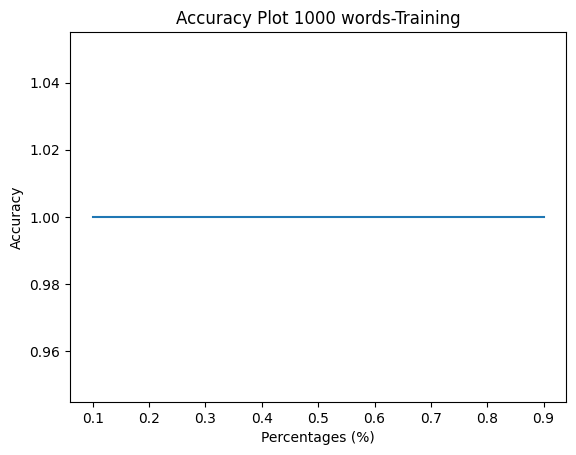

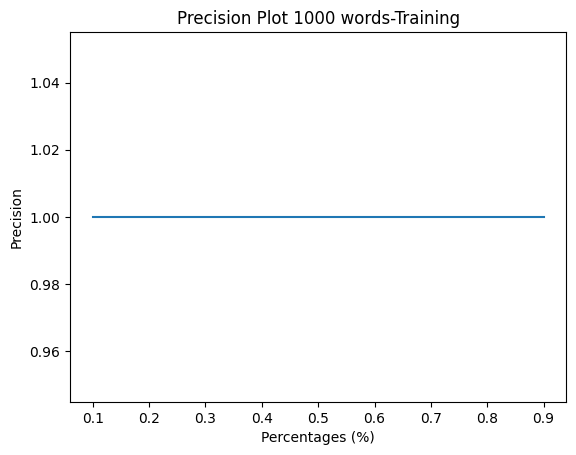

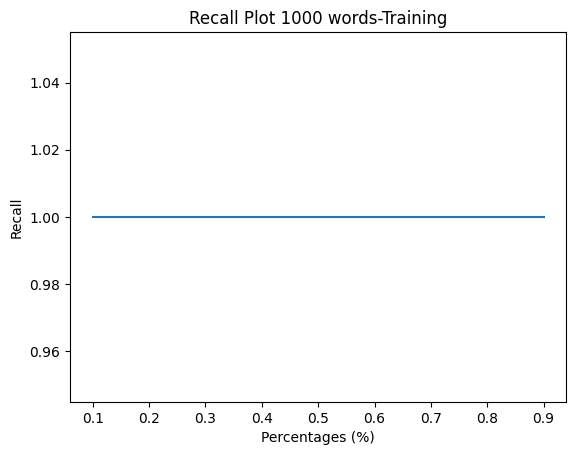

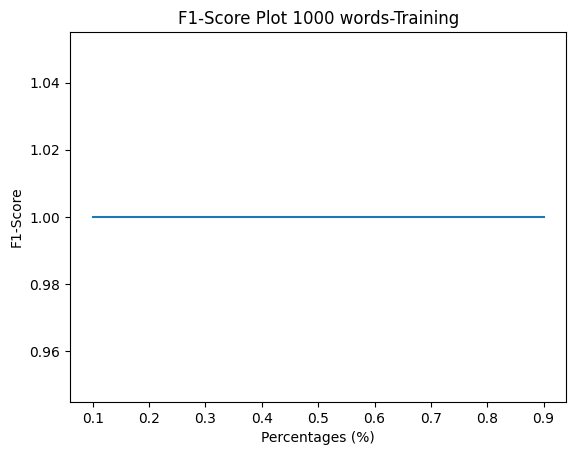

In [26]:
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
DrawPlot(percentages, custom_train_accuracy, metrics[0], "Training", N)
DrawPlot(percentages, custom_train_precision, metrics[1], "Training", N)
DrawPlot(percentages, custom_train_recall, metrics[2], "Training", N)
DrawPlot(percentages, custom_train_f_measure, metrics[3], "Training", N)

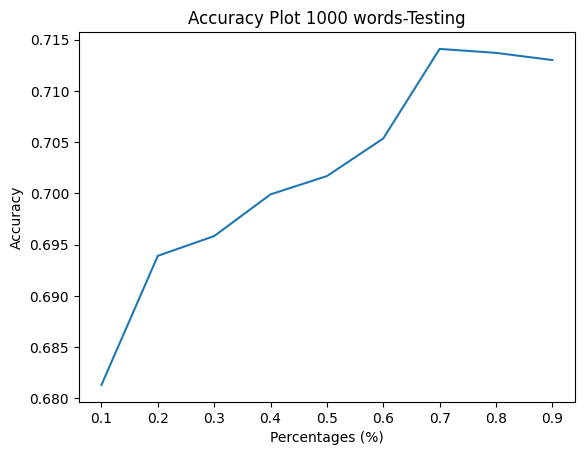

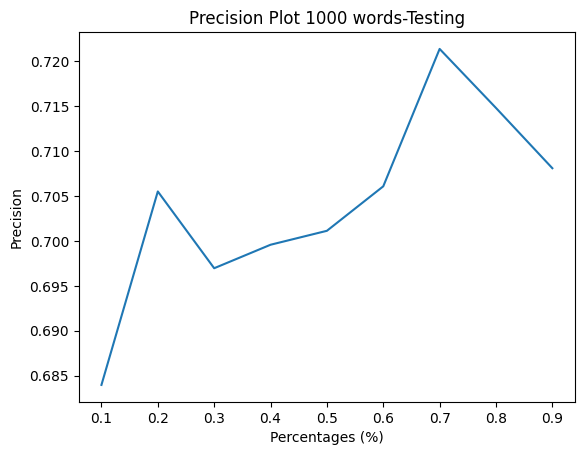

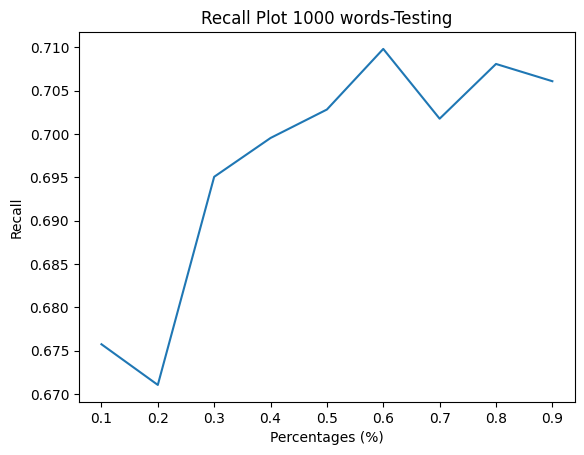

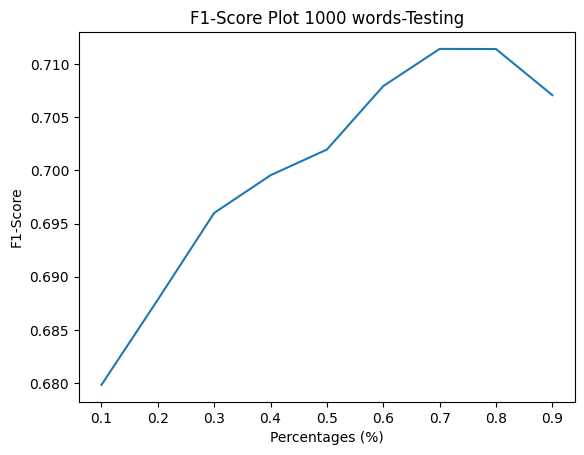

In [27]:
DrawPlot(percentages, custom_test_accuracy, metrics[0], "Testing", N)
DrawPlot(percentages, custom_test_precision, metrics[1],"Testing", N)
DrawPlot(percentages, custom_test_recall, metrics[2], "Testing", N)
DrawPlot(percentages, custom_test_f_measure, metrics[3], "Testing", N)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

sklearn_id3_metrics = {
    'Train Accuracy': [],
    'Train Precision': [],
    'Train Recall': [],
    'Train F1 Score': [],
    'Test Accuracy': [],
    'Test Precision': [],
    'Test Recall': [],
    'Test F1 Score': []
}

for percentage in percentages:

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=(100 - percentage) / 100, random_state=42)

    sklearn_id3 = DecisionTreeClassifier()
    sklearn_id3.fit(X_train, y_train)

    train_predictions = sklearn_id3.predict(X_train)
    test_predictions = sklearn_id3.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_predictions)
    train_precision = precision_score(y_train, train_predictions)
    train_recall = recall_score(y_train, train_predictions)
    train_f1_score = f1_score(y_train, train_predictions)

    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions)
    test_recall = recall_score(y_test, test_predictions)
    test_f1_score = f1_score(y_test, test_predictions)

    print("----------------------------------------------")
    print(f"Training Size: {percentage * 100}%")
    print(f"Train Accuracy: {train_accuracy * 100}%")
    print(f"Train Precision: {train_precision * 100}%")
    print(f"Train Recall: {train_recall * 100}%")
    print(f"Train F1 Score: {train_f1_score * 100}%")
    print(f"Test Accuracy: {test_accuracy * 100}%")
    print(f"Test Precision: {test_precision * 100}%")
    print(f"Test Recall: {test_recall * 100}%")
    print(f"Test F1 Score: {test_f1_score * 100}%")
    print("----------------------------------------------")

    sklearn_id3_metrics['Train Accuracy'].append(train_accuracy)
    sklearn_id3_metrics['Train Precision'].append(train_precision)
    sklearn_id3_metrics['Train Recall'].append(train_recall)
    sklearn_id3_metrics['Train F1 Score'].append(train_f1_score)
    sklearn_id3_metrics['Test Accuracy'].append(test_accuracy)
    sklearn_id3_metrics['Test Precision'].append(test_precision)
    sklearn_id3_metrics['Test Recall'].append(test_recall)
    sklearn_id3_metrics['Test F1 Score'].append(test_f1_score)

----------------------------------------------
Training Size: 10.0%
Train Accuracy: 100.0%
Train Precision: 100.0%
Train Recall: 100.0%
Train F1 Score: 100.0%
Test Accuracy: 53.82875217713359%
Test Precision: 55.317733170677606%
Test Recall: 39.93435010608062%
Test F1 Score: 46.38381959781472%
----------------------------------------------
----------------------------------------------
Training Size: 20.0%
Train Accuracy: 100.0%
Train Precision: 100.0%
Train Recall: 100.0%
Train F1 Score: 100.0%
Test Accuracy: 58.625250501002%
Test Precision: 59.66823582156467%
Test Recall: 53.323450458752355%
Test F1 Score: 56.31770480704129%
----------------------------------------------
----------------------------------------------
Training Size: 30.0%
Train Accuracy: 100.0%
Train Precision: 100.0%
Train Recall: 100.0%
Train F1 Score: 100.0%
Test Accuracy: 60.81644934804413%
Test Precision: 62.63386802600196%
Test Recall: 53.70949631055502%
Test F1 Score: 57.829400462013425%
-----------------------

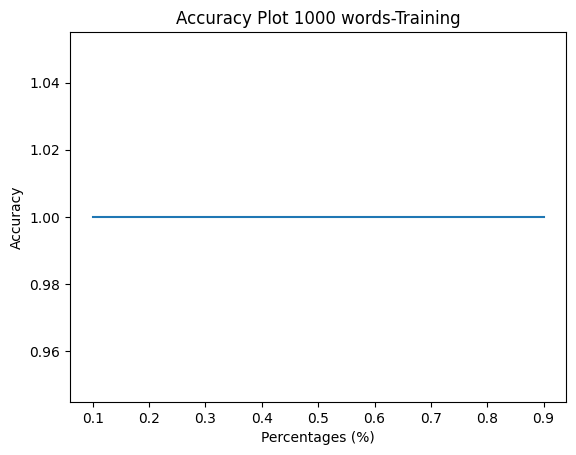

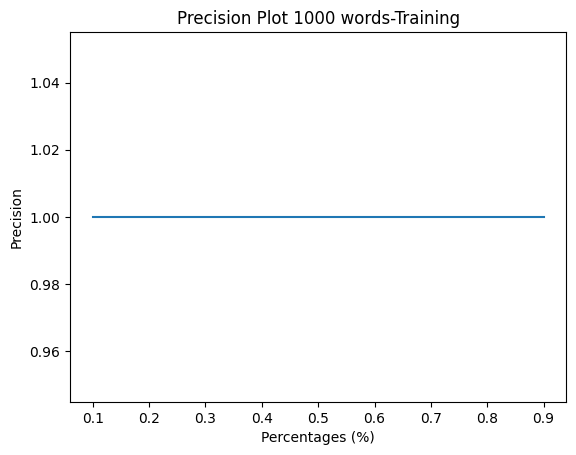

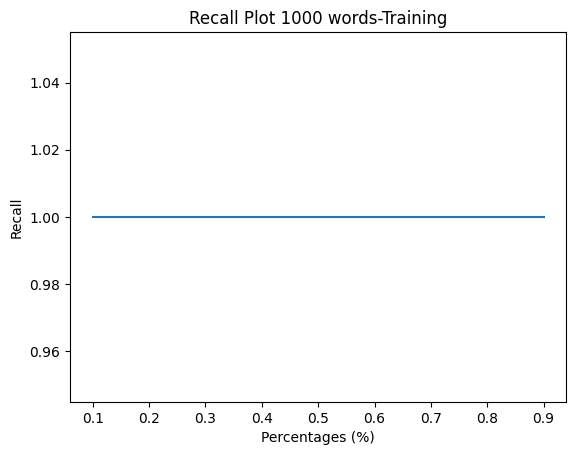

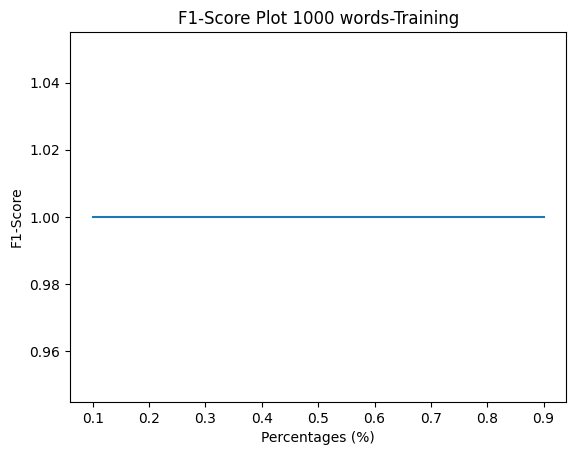

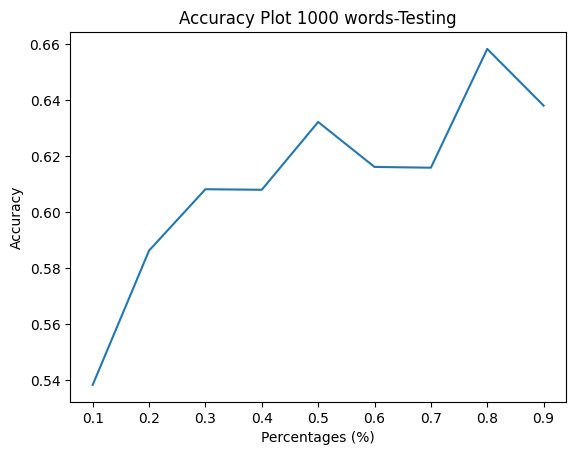

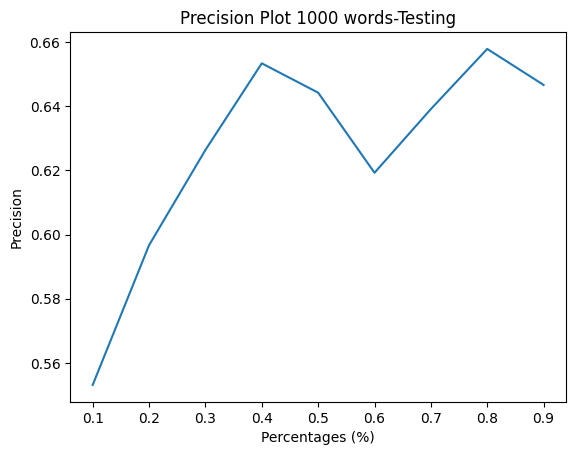

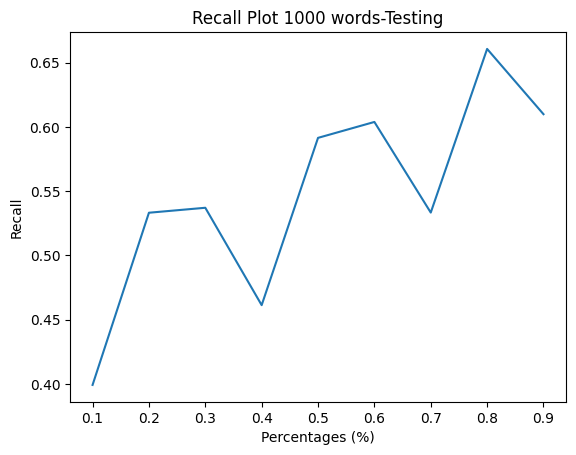

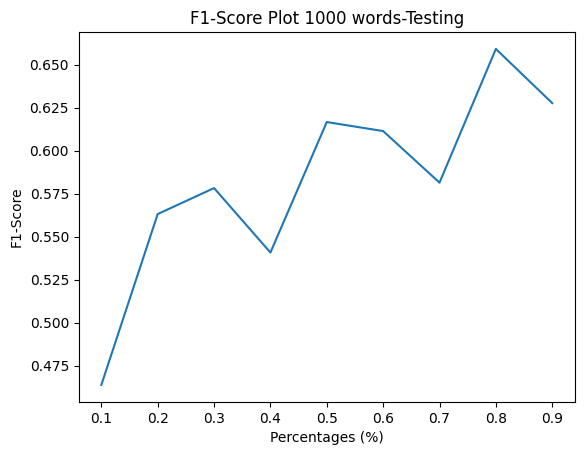

In [29]:
DrawPlot(percentages, sklearn_id3_metrics['Train Accuracy'], metrics[0], "Training", N)
DrawPlot(percentages, sklearn_id3_metrics['Train Precision'], metrics[1], "Training", N)
DrawPlot(percentages, sklearn_id3_metrics['Train Recall'], metrics[2], "Training", N)
DrawPlot(percentages, sklearn_id3_metrics['Train F1 Score'], metrics[3], "Training", N)

DrawPlot(percentages, sklearn_id3_metrics['Test Accuracy'], metrics[0], "Testing", N)
DrawPlot(percentages, sklearn_id3_metrics['Test Precision'], metrics[1], "Testing", N)
DrawPlot(percentages, sklearn_id3_metrics['Test Recall'], metrics[2], "Testing", N)
DrawPlot(percentages, sklearn_id3_metrics['Test F1 Score'], metrics[3], "Testing", N)